In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
df = pd.read_csv('/content/Datains_Marcella_Price_Monitoring_TP_Link_TP_Link_Price_Monitoring.csv', low_memory=False)
df.head()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,10/22/2022,10/22/2022,TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,10/22/2022,10/22/2022,TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,10/22/2022,10/22/2022,TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,10/22/2022,10/22/2022,TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,10/22/2022,10/22/2022,TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [51]:
df.shape

(32772, 18)

In [52]:
df.isna().sum()

,0
Date,0
Last Crawling,0
SKU Name,0
Product Name,0
Url Product,0
Seller,0
Merchant,0
Stock,0
Item Condition,0
Filter,0


In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df = df[['Original Price', 'Selling Price']]
df.head()

,Original Price,Selling Price
0,231000,231000
1,218800,218800
2,227000,227000
3,263000,263000
4,236000,236000


In [55]:
df.loc[:, 'Original Price']= pd.to_numeric(df['Original Price'], errors='coerce').fillna(0).astype(float).astype(int)


In [56]:
df.dtypes

,0
Original Price,object
Selling Price,int64


In [57]:
df = (df - df.min()) / (df.max() - df.min())
df.head()

,Original Price,Selling Price
0,0.004162,0.003713
1,0.003942,0.003493
2,0.00409,0.003641
3,0.004739,0.00429
4,0.004252,0.003804


In [58]:
# plt.figure(figsize=(11, 10))
# sns.boxplot(data=df)
# plt.show()

In [59]:
def outlier_threshold(df, col, q1=0.25, q3=0.75):
    quartile1 = df[col].quantile(q1) #25% batas bawah
    quartile3 = df[col].quantile(q3) #75% batas atah
    interquartil_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartil_range #rumus
    low_limit = quartile1 - 1.5 * interquartil_range #rumus
    return low_limit, up_limit

def replace_with_threshold(df, col):
    low, up = outlier_threshold(df, col)
    df[col] = np.where(df[col] > up, up , np.where(df[col] < low, low, df[col]))
    return df

for i in df.columns:
    df = replace_with_threshold(df, i)

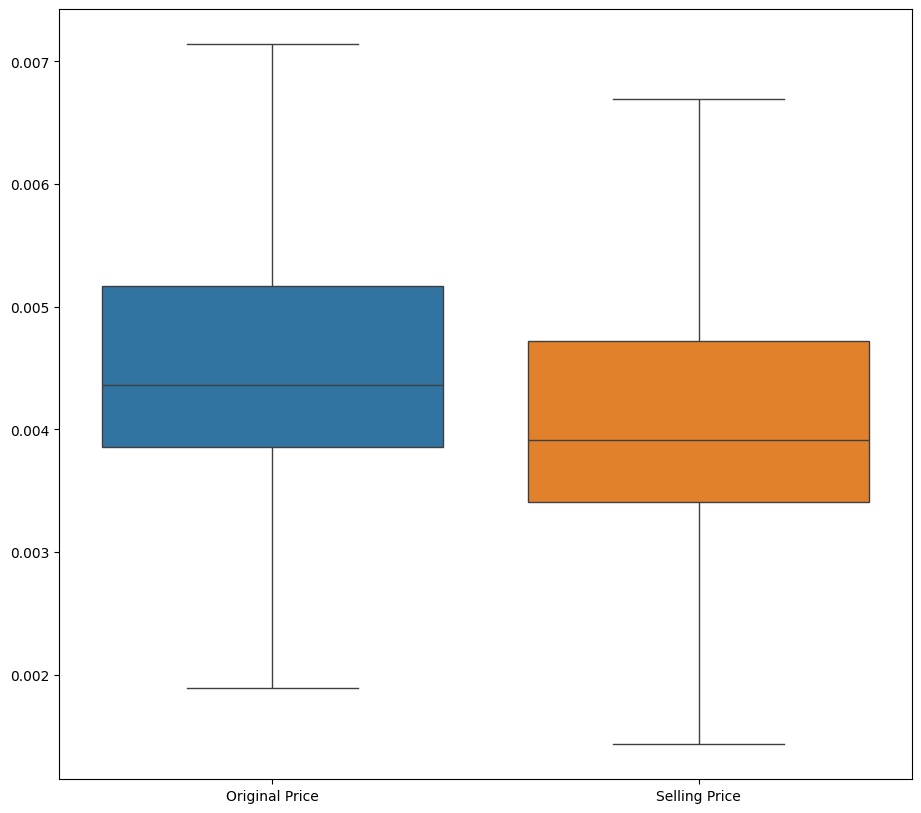

In [60]:
plt.figure(figsize=(11, 10))
sns.boxplot(data=df)
plt.show()

In [61]:
x = df[['Original Price']]
y = df['Selling Price']

x

,Original Price
0,0.004162
1,0.003942
2,0.00409
3,0.004739
4,0.004252
...,...
32767,0.004396
32768,0.00382
32769,0.004896
32770,0.003784


In [62]:
y

,Selling Price
0,0.003713
1,0.003493
2,0.003641
3,0.00429
4,0.003804
...,...
32767,0.003948
32768,0.003371
32769,0.004448
32770,0.003335


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
model = LinearRegression()

# Combine x_train and y_train to drop rows with NaN values in y_train
train_data = pd.DataFrame({'Original Price': x_train['Original Price'], 'Selling Price': y_train})
train_data_cleaned = train_data.dropna()

x_train_cleaned = train_data_cleaned[['Original Price']]
y_train_cleaned = train_data_cleaned['Selling Price']

model.fit(x_train_cleaned, y_train_cleaned)

# Also clean y_test before prediction and evaluation to ensure consistency
test_data = pd.DataFrame({'Original Price': x_test['Original Price'], 'Selling Price': y_test})
test_data_cleaned = test_data.dropna()

x_test_cleaned = test_data_cleaned[['Original Price']]
y_test_cleaned = test_data_cleaned['Selling Price']

y_pred = model.predict(x_test_cleaned)

In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9941694187487046


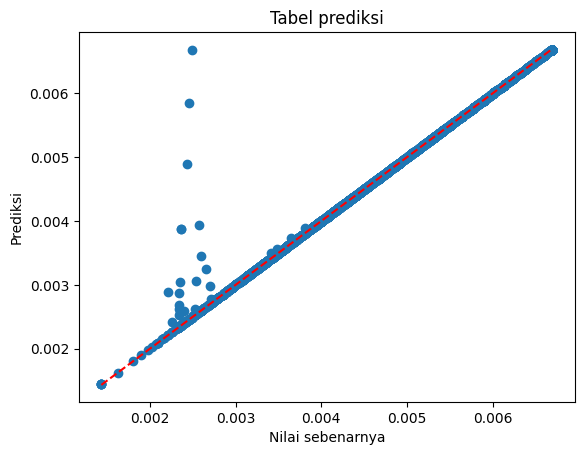

In [67]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.title("Tabel prediksi")
plt.xlabel("Nilai sebenarnya")
plt.ylabel("Prediksi")
plt.show()